# Reading the output from `sinsin2dtex.cu`

We go from a flattened `std::vector` (C++, representing 2-dimensional data) to a `.csv` file.  

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import csv

In [48]:
ld = [ 1., 1.]
WIDTH  = 640
HEIGHT = 640
print WIDTH*HEIGHT
hd = [ld[0]/(float(WIDTH)), ld[1]/(float(HEIGHT)) ]

409600


In [15]:
with open('sinsin2dtex_result.csv','r') as csvfile_result:
    plot_results = csv.reader(csvfile_result, delimiter=',')
    result_list = list(  list(rec) for rec in plot_results ) 
    
with open('sinsin2dtex_ogref.csv','r') as csvfile_ogref:
    plot_ogref = csv.reader(csvfile_ogref, delimiter=',')
    ogref_list = list(  list(rec) for rec in plot_ogref ) 

In [16]:
csvfile_result.close()
csvfile_ogref.close()

In [21]:
result_list = [[float(ele) for ele in row] for row in result_list]
ogref_list = [[float(ele) for ele in row] for row in ogref_list]

In [25]:
# sanity check
print len(result_list); print len(result_list[0]); 
print result_list[ len(result_list)/4][ len(result_list[0])/4 : len(result_list[0])/4+22];

print len(ogref_list); print len(ogref_list[0]); 
print ogref_list[ len(ogref_list)/4][ len(ogref_list[0])/4 : len(ogref_list[0])/4+22]

640
640
[0.999952, 0.999952, 0.999855, 0.999663, 0.999374, 0.998988, 0.998506, 0.997929, 0.997254, 0.996484, 0.995618, 0.994656, 0.993598, 0.992444, 0.991194, 0.989849, 0.988409, 0.986873, 0.985242, 0.983516, 0.981696, 0.97978]
640
640
[0.999952, 0.999952, 0.999855, 0.999663, 0.999374, 0.998988, 0.998506, 0.997929, 0.997254, 0.996484, 0.995618, 0.994656, 0.993598, 0.992444, 0.991194, 0.989849, 0.988409, 0.986873, 0.985242, 0.983516, 0.981696, 0.97978]


## Quick aside on *Wireframe plots* in `matplotlib`

cf. [`mplot3d` tutorial, `matplotlib`](http://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html)

In [26]:
from mpl_toolkits.mplot3d import axes3d
import numpy as np

In [27]:
fig = plt.figure()

In [29]:
ax = fig.add_subplot(111,projection='3d')
X, Y, Z = axes3d.get_test_data(0.05)

In [30]:
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)

In [31]:
plt.show()

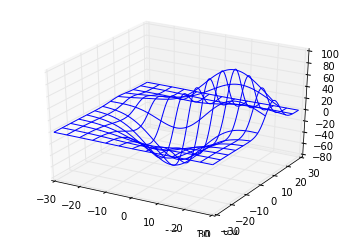

In [32]:
fig

In [41]:
print type(X), type(Y), type(Z); print len(X), len(Y), len(Z); print X.shape, Y.shape, Z.shape;

<type 'numpy.ndarray'> <type 'numpy.ndarray'> <type 'numpy.ndarray'>
120 120 120
(120, 120) (120, 120) (120, 120)


In [43]:
X

array([[-30. , -29.5, -29. , ...,  28.5,  29. ,  29.5],
       [-30. , -29.5, -29. , ...,  28.5,  29. ,  29.5],
       [-30. , -29.5, -29. , ...,  28.5,  29. ,  29.5],
       ..., 
       [-30. , -29.5, -29. , ...,  28.5,  29. ,  29.5],
       [-30. , -29.5, -29. , ...,  28.5,  29. ,  29.5],
       [-30. , -29.5, -29. , ...,  28.5,  29. ,  29.5]])

In [44]:
Y

array([[-30. , -30. , -30. , ..., -30. , -30. , -30. ],
       [-29.5, -29.5, -29.5, ..., -29.5, -29.5, -29.5],
       [-29. , -29. , -29. , ..., -29. , -29. , -29. ],
       ..., 
       [ 28.5,  28.5,  28.5, ...,  28.5,  28.5,  28.5],
       [ 29. ,  29. ,  29. , ...,  29. ,  29. ,  29. ],
       [ 29.5,  29.5,  29.5, ...,  29.5,  29.5,  29.5]])

In [45]:
Z

array([[-0.00982064, -0.0113957 , -0.01319036, ..., -0.01522953,
        -0.01319036, -0.0113957 ],
       [-0.0113957 , -0.01322338, -0.01530587, ..., -0.01767209,
        -0.01530587, -0.01322338],
       [-0.01319036, -0.01530587, -0.01771632, ..., -0.02045518,
        -0.01771632, -0.01530587],
       ..., 
       [-0.01200234, -0.01414685, -0.01660867, ...,  0.02918791,
         0.03019517,  0.03085725],
       [-0.01097235, -0.01288301, -0.01507265, ...,  0.01583738,
         0.01709512,  0.01804782],
       [-0.00988645, -0.01157475, -0.01350698, ...,  0.00702321,
         0.0083816 ,  0.00947216]])

In [46]:
X[0][0:10]

array([-30. , -29.5, -29. , -28.5, -28. , -27.5, -27. , -26.5, -26. , -25.5])

EY : At least what I could surmise or infer the 2-dim. (???) python arrays for `X,Y,Z` of the wireframe plot work like this: imagine a 2-dimensional grid; on top of each grid point is the x-coordinate, then the y-coordinate, and then the z-coordinate.  Thus you have 2-dimensional arrays for each.    

## Making `X,Y,Z` axes for `mplot3d` from the `.csv` files

In [55]:
X_sinsin = np.array( [[i*hd[0] for i in range(WIDTH)] for j in range(HEIGHT)] )
Y_sinsin = np.array( [[j*hd[1] for i in range(WIDTH)] for j in range(HEIGHT)] )
Z_sinsinresult = np.array( [[result_list[i][j] for i in range(WIDTH)] for j in range(HEIGHT)] )
Z_sinsinogref  = np.array( [[ogref_list[i][j] for i in range(WIDTH)] for j in range(HEIGHT)]  )


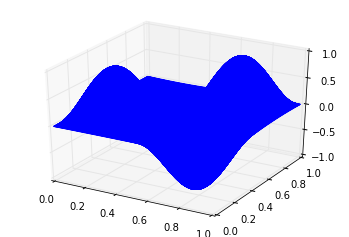

In [56]:
fig02 = plt.figure()
ax02 = fig02.add_subplot(111,projection='3d')
ax02.plot_wireframe(X_sinsin, Y_sinsin, Z_sinsinresult )

In [57]:
plt.show()

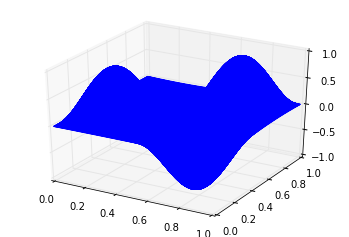

In [59]:
fig02

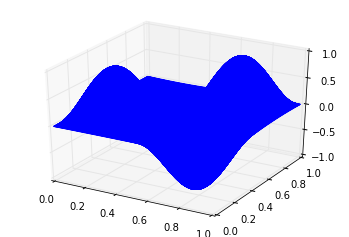

In [60]:
fig03 = plt.figure()
ax03 = fig03.add_subplot(111,projection='3d')
ax03.plot_wireframe(X_sinsin, Y_sinsin, Z_sinsinogref )

In [61]:
plt.show()

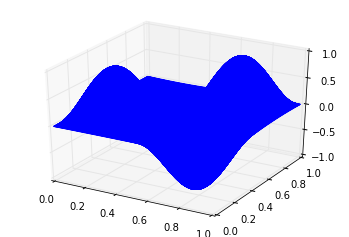

In [62]:
fig03